In [312]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [313]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [314]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [315]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [316]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [317]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [318]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [319]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [320]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [321]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [322]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [323]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [324]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [325]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [326]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [327]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [328]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [329]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [330]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [331]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [332]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [333]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [334]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [335]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [336]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [337]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


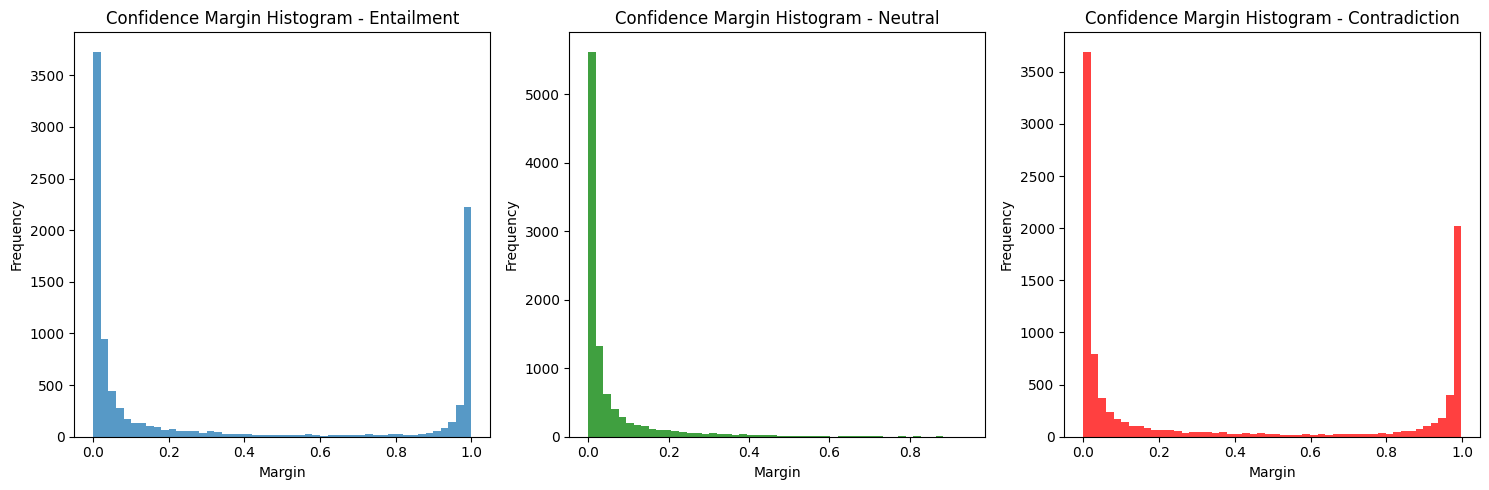

In [338]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [339]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [340]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [341]:
high_confidence_anli_r3

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515,1
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120,2
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189,0
5,0.002461,0.150678,0.846861,0.999220,0.000554,0.000227,0.985221,0.014745,0.000034,0,0.013998,0.135933,0.846635,2
8,0.131793,0.776056,0.092151,0.000384,0.002570,0.997046,0.049409,0.904356,0.046236,0,0.082384,0.128299,0.904895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.957103,0.040533,0.002363,0.000066,0.000316,0.999618,0.009265,0.016116,0.974619,2,0.947838,0.024417,0.024999,0
1194,0.945850,0.052813,0.001337,0.000607,0.000853,0.998540,0.000205,0.000291,0.999504,2,0.945243,0.051960,0.000965,0
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379,0
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452,2


In [342]:
high_confidence_mnli_mismatched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2,0.998773,0.003385,0.004211,0
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2,0.991698,0.008714,0.014951,0
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0,0.011021,0.011334,0.992721,2
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2,0.825931,0.525168,0.526413,0
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0,0.009215,0.010844,0.993904,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.000760,0.013837,0.985402,0.972984,0.025382,0.001634,0.925212,0.069991,0.004798,0,0.047772,0.044608,0.980605,2
9825,0.000145,0.003906,0.995949,0.952827,0.045891,0.001281,0.965645,0.032757,0.001598,0,0.012818,0.013134,0.994351,2
9826,0.996226,0.003656,0.000118,0.000353,0.104717,0.894930,0.004991,0.039946,0.955062,2,0.991234,0.064771,0.060132,0
9828,0.997044,0.001226,0.001730,0.000364,0.000717,0.998919,0.019078,0.039258,0.941663,2,0.977966,0.038033,0.057256,0


In [343]:
!pip install  torch-geometric

In [344]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


In [345]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Function to create graph data
def create_graph(data, labels):
    num_nodes = data.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))
    return graph_data


# Define the enhanced GAT model with residual connections and multi-head attention
class EnhancedGAT(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim=32, heads=4, output_heads=1, dropout=0.3):
        super(EnhancedGAT, self).__init__()
        # First GAT layer with multi-head attention
        self.conv1 = GATConv(input_dim, hidden_dim, heads=heads, dropout=dropout, concat=True)
        # Second GAT layer with single attention head
        self.conv2 = GATConv(hidden_dim * heads, 3, heads=output_heads, dropout=dropout, concat=False)
        self.dropout = dropout
        self.residual = input_dim == 3  # Residual connection if input dimension matches output dimension

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Apply first GAT layer with attention dropout
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)  # Dropout for regularization
        # Apply second GAT layer and residual connection if needed
        x = self.conv2(x, edge_index)
        if self.residual:
            x += data.x  # Add residual connection
        return F.log_softmax(x, dim=1)  # Log-softmax for classification

# Define the early stopping class
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True



In [346]:
import torch
from sklearn.metrics import f1_score, recall_score

# Function to train and evaluate the enhanced GAT with F1-score and Recall
def train_and_evaluate_enhanced_gat(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = EnhancedGAT(input_dim)  # Instantiate Enhanced GAT model with the correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()
    
    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)
    
    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_f1_scores = []
    val_f1_scores = []
    train_recalls = []
    val_recalls = []
    
    # Training with validation and early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss
        
        # Calculate training F1-score and recall
        train_pred = out.argmax(dim=1)  # Get predicted labels
        train_f1 = f1_score(train_data.y.cpu(), train_pred.cpu(), average='weighted')
        train_recall = recall_score(train_data.y.cpu(), train_pred.cpu(), average='weighted')
        train_f1_scores.append(train_f1)
        train_recalls.append(train_recall)
        
        # Validation loop
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())
            val_pred = val_out.argmax(dim=1)  # Get predicted labels
            val_f1 = f1_score(test_data.y.cpu(), val_pred.cpu(), average='weighted')
            val_recall = recall_score(test_data.y.cpu(), val_pred.cpu(), average='weighted')
            val_f1_scores.append(val_f1)
            val_recalls.append(val_recall)
        
        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break
        
        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val F1: {val_f1:.4f}, Val Recall: {val_recall:.4f}")
    
    # Final validation F1 and Recall
    final_val_f1 = val_f1_scores[-1]
    final_val_recall = val_recalls[-1]
    
    print(f"Final Validation F1 on {name}: {final_val_f1:.4f}")
    print(f"Final Validation Recall on {name}: {final_val_recall:.4f}")
    
    return model, final_val_f1, final_val_recall

In [347]:
X_train_snli, X_test_snli, y_train_snli, y_test_snli = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Create graph data for SNLI
train_graph_snli = create_graph(X_train_snli, y_train_snli)
test_graph_snli = create_graph(X_test_snli, y_test_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate_enhanced_gat(
    train_graph_snli, test_graph_snli, 'SNLI ENHANCED GAT'
)


Epoch 1/100, Train Loss: 0.9795, Val Loss: 0.8037, Val F1: 0.9205, Val Recall: 0.9437
Epoch 2/100, Train Loss: 0.8561, Val Loss: 0.6831, Val F1: 0.9205, Val Recall: 0.9437
Epoch 3/100, Train Loss: 0.7486, Val Loss: 0.5815, Val F1: 0.9205, Val Recall: 0.9437
Epoch 4/100, Train Loss: 0.6780, Val Loss: 0.4980, Val F1: 0.9205, Val Recall: 0.9437
Epoch 5/100, Train Loss: 0.6090, Val Loss: 0.4296, Val F1: 0.9205, Val Recall: 0.9437
Epoch 6/100, Train Loss: 0.5669, Val Loss: 0.3743, Val F1: 0.9205, Val Recall: 0.9437
Epoch 7/100, Train Loss: 0.5461, Val Loss: 0.3304, Val F1: 0.9205, Val Recall: 0.9437
Epoch 8/100, Train Loss: 0.5201, Val Loss: 0.2964, Val F1: 0.9213, Val Recall: 0.9445
Epoch 9/100, Train Loss: 0.5169, Val Loss: 0.2702, Val F1: 0.9213, Val Recall: 0.9445
Epoch 10/100, Train Loss: 0.4860, Val Loss: 0.2495, Val F1: 0.9213, Val Recall: 0.9445
Epoch 11/100, Train Loss: 0.4716, Val Loss: 0.2334, Val F1: 0.9213, Val Recall: 0.9445
Epoch 12/100, Train Loss: 0.4777, Val Loss: 0.2207, 

In [348]:
X_train_mnli_matched, X_test_mnli_matched, y_train_mnli_matched, y_test_mnli_matched = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Create graph data for MNLI Matched
train_graph_mnli_matched = create_graph(X_train_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_test_mnli_matched, y_test_mnli_matched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate_enhanced_gat(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.1852, Val Loss: 0.9660, Val F1: 0.9462, Val Recall: 0.9608
Epoch 2/100, Train Loss: 1.0009, Val Loss: 0.8033, Val F1: 0.9453, Val Recall: 0.9608
Epoch 3/100, Train Loss: 0.8607, Val Loss: 0.6657, Val F1: 0.9462, Val Recall: 0.9616
Epoch 4/100, Train Loss: 0.7401, Val Loss: 0.5523, Val F1: 0.9462, Val Recall: 0.9616
Epoch 5/100, Train Loss: 0.6618, Val Loss: 0.4605, Val F1: 0.9462, Val Recall: 0.9616
Epoch 6/100, Train Loss: 0.6004, Val Loss: 0.3882, Val F1: 0.9462, Val Recall: 0.9616
Epoch 7/100, Train Loss: 0.5503, Val Loss: 0.3323, Val F1: 0.9462, Val Recall: 0.9616
Epoch 8/100, Train Loss: 0.5312, Val Loss: 0.2895, Val F1: 0.9462, Val Recall: 0.9616
Epoch 9/100, Train Loss: 0.5052, Val Loss: 0.2575, Val F1: 0.9462, Val Recall: 0.9616
Epoch 10/100, Train Loss: 0.4936, Val Loss: 0.2337, Val F1: 0.9462, Val Recall: 0.9616
Epoch 11/100, Train Loss: 0.4844, Val Loss: 0.2160, Val F1: 0.9462, Val Recall: 0.9616
Epoch 12/100, Train Loss: 0.4804, Val Loss: 0.2031, 

In [349]:
X_train_mnli_mismatched, X_test_mnli_mismatched, y_train_mnli_mismatched, y_test_mnli_mismatched = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Create graph data for MNLI mismatched
train_graph_mnli_mismatched = create_graph(X_train_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_test_mnli_mismatched, y_test_mnli_mismatched)

# Call the function to train and evaluate for MNLI Matched
model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate_enhanced_gat(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.0972, Val Loss: 0.8878, Val F1: 0.9483, Val Recall: 0.9636
Epoch 2/100, Train Loss: 0.9371, Val Loss: 0.7458, Val F1: 0.9508, Val Recall: 0.9662
Epoch 3/100, Train Loss: 0.7978, Val Loss: 0.6242, Val F1: 0.9508, Val Recall: 0.9662
Epoch 4/100, Train Loss: 0.7111, Val Loss: 0.5232, Val F1: 0.9508, Val Recall: 0.9662
Epoch 5/100, Train Loss: 0.6451, Val Loss: 0.4407, Val F1: 0.9508, Val Recall: 0.9662
Epoch 6/100, Train Loss: 0.5785, Val Loss: 0.3734, Val F1: 0.9508, Val Recall: 0.9662
Epoch 7/100, Train Loss: 0.5517, Val Loss: 0.3197, Val F1: 0.9508, Val Recall: 0.9662
Epoch 8/100, Train Loss: 0.5155, Val Loss: 0.2769, Val F1: 0.9508, Val Recall: 0.9662
Epoch 9/100, Train Loss: 0.4896, Val Loss: 0.2432, Val F1: 0.9508, Val Recall: 0.9662
Epoch 10/100, Train Loss: 0.4957, Val Loss: 0.2175, Val F1: 0.9508, Val Recall: 0.9662
Epoch 11/100, Train Loss: 0.4804, Val Loss: 0.1979, Val F1: 0.9508, Val Recall: 0.9662
Epoch 12/100, Train Loss: 0.4633, Val Loss: 0.1832, 

In [350]:
X_train_anli_r1, X_test_anli_r1, y_train_anli_r1, y_test_anli_r1 = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Create graph data for ANLI r1
train_graph_anli_r1 = create_graph(X_train_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_test_anli_r1, y_test_anli_r1)

# Call the function to train and evaluate for ANLI r1
model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI R1 ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.1204, Val Loss: 1.0080, Val F1: 0.7551, Val Recall: 0.7558
Epoch 2/100, Train Loss: 1.0365, Val Loss: 0.9118, Val F1: 0.8114, Val Recall: 0.8140
Epoch 3/100, Train Loss: 0.9536, Val Loss: 0.8315, Val F1: 0.7985, Val Recall: 0.8140
Epoch 4/100, Train Loss: 0.8903, Val Loss: 0.7630, Val F1: 0.8197, Val Recall: 0.8372
Epoch 5/100, Train Loss: 0.8580, Val Loss: 0.7052, Val F1: 0.8197, Val Recall: 0.8372
Epoch 6/100, Train Loss: 0.8516, Val Loss: 0.6578, Val F1: 0.8356, Val Recall: 0.8488
Epoch 7/100, Train Loss: 0.8417, Val Loss: 0.6192, Val F1: 0.8356, Val Recall: 0.8488
Epoch 8/100, Train Loss: 0.8040, Val Loss: 0.5868, Val F1: 0.8356, Val Recall: 0.8488
Epoch 9/100, Train Loss: 0.7704, Val Loss: 0.5596, Val F1: 0.8356, Val Recall: 0.8488
Epoch 10/100, Train Loss: 0.7848, Val Loss: 0.5374, Val F1: 0.8401, Val Recall: 0.8488
Epoch 11/100, Train Loss: 0.7772, Val Loss: 0.5201, Val F1: 0.8203, Val Recall: 0.8256
Epoch 12/100, Train Loss: 0.8132, Val Loss: 0.5076, 

In [351]:
X_train_anli_r2, X_test_anli_r2, y_train_anli_r2, y_test_anli_r2 = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Create graph data for ANLI r2
train_graph_anli_r2 = create_graph(X_train_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_test_anli_r2, y_test_anli_r2)

# Call the function to train and evaluate for ANLI r2
model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI R2 ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.2348, Val Loss: 1.1210, Val F1: 0.1545, Val Recall: 0.3146
Epoch 2/100, Train Loss: 1.1574, Val Loss: 1.0460, Val F1: 0.3436, Val Recall: 0.4270
Epoch 3/100, Train Loss: 1.0672, Val Loss: 0.9838, Val F1: 0.5400, Val Recall: 0.6292
Epoch 4/100, Train Loss: 1.0160, Val Loss: 0.9306, Val F1: 0.5603, Val Recall: 0.6517
Epoch 5/100, Train Loss: 0.9951, Val Loss: 0.8856, Val F1: 0.5705, Val Recall: 0.6629
Epoch 6/100, Train Loss: 0.9411, Val Loss: 0.8482, Val F1: 0.5705, Val Recall: 0.6629
Epoch 7/100, Train Loss: 0.9299, Val Loss: 0.8161, Val F1: 0.5705, Val Recall: 0.6629
Epoch 8/100, Train Loss: 0.8991, Val Loss: 0.7885, Val F1: 0.5705, Val Recall: 0.6629
Epoch 9/100, Train Loss: 0.8925, Val Loss: 0.7655, Val F1: 0.5705, Val Recall: 0.6629
Epoch 10/100, Train Loss: 0.8905, Val Loss: 0.7457, Val F1: 0.6702, Val Recall: 0.7079
Epoch 11/100, Train Loss: 0.8545, Val Loss: 0.7287, Val F1: 0.7047, Val Recall: 0.7191
Epoch 12/100, Train Loss: 0.8485, Val Loss: 0.7149, 

In [352]:
X_train_anli_r3, X_test_anli_r3, y_train_anli_r3, y_test_anli_r3 = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Create graph data for ANLI r3
train_graph_anli_r3 = create_graph(X_train_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_test_anli_r3, y_test_anli_r3)

# Call the function to train and evaluate for ANLI r3
model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate_enhanced_gat(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI R3 ENHANCED GAT'
)

Epoch 1/100, Train Loss: 1.0767, Val Loss: 0.9906, Val F1: 0.5812, Val Recall: 0.6887
Epoch 2/100, Train Loss: 1.0143, Val Loss: 0.9307, Val F1: 0.5812, Val Recall: 0.6887
Epoch 3/100, Train Loss: 0.9881, Val Loss: 0.8821, Val F1: 0.5837, Val Recall: 0.6698
Epoch 4/100, Train Loss: 0.9333, Val Loss: 0.8423, Val F1: 0.6485, Val Recall: 0.6887
Epoch 5/100, Train Loss: 0.9328, Val Loss: 0.8096, Val F1: 0.6883, Val Recall: 0.6981
Epoch 6/100, Train Loss: 0.8713, Val Loss: 0.7805, Val F1: 0.6944, Val Recall: 0.6981
Epoch 7/100, Train Loss: 0.8834, Val Loss: 0.7561, Val F1: 0.7016, Val Recall: 0.7075
Epoch 8/100, Train Loss: 0.8413, Val Loss: 0.7338, Val F1: 0.6940, Val Recall: 0.7075
Epoch 9/100, Train Loss: 0.8534, Val Loss: 0.7155, Val F1: 0.7026, Val Recall: 0.7170
Epoch 10/100, Train Loss: 0.8372, Val Loss: 0.7010, Val F1: 0.7112, Val Recall: 0.7264
Epoch 11/100, Train Loss: 0.8467, Val Loss: 0.6902, Val F1: 0.7198, Val Recall: 0.7358
Epoch 12/100, Train Loss: 0.8402, Val Loss: 0.6830, 

In [353]:
import torch

# Convert NumPy arrays to PyTorch tensors
X_train_snli_tensor = torch.tensor(X_train_snli)
X_train_mnli_matched_tensor = torch.tensor(X_train_mnli_matched)
X_train_mnli_mismatched_tensor = torch.tensor(X_train_mnli_mismatched)
X_train_anli_r1_tensor = torch.tensor(X_train_anli_r1)
X_train_anli_r2_tensor = torch.tensor(X_train_anli_r2)
X_train_anli_r3_tensor = torch.tensor(X_train_anli_r3)

y_train_snli_tensor = torch.tensor(y_train_snli)
y_train_mnli_matched_tensor = torch.tensor(y_train_mnli_matched)
y_train_mnli_mismatched_tensor = torch.tensor(y_train_mnli_mismatched)
y_train_anli_r1_tensor = torch.tensor(y_train_anli_r1)
y_train_anli_r2_tensor = torch.tensor(y_train_anli_r2)
y_train_anli_r3_tensor = torch.tensor(y_train_anli_r3)

# Concatenate X_train and y_train for all tasks
X_train_all = torch.cat([X_train_snli_tensor, X_train_mnli_matched_tensor, X_train_mnli_mismatched_tensor, X_train_anli_r1_tensor, X_train_anli_r2_tensor, X_train_anli_r3_tensor], dim=0)
y_train_all = torch.cat([y_train_snli_tensor, y_train_mnli_matched_tensor, y_train_mnli_mismatched_tensor, y_train_anli_r1_tensor, y_train_anli_r2_tensor, y_train_anli_r3_tensor], dim=0)

# Convert NumPy arrays to PyTorch tensors for test data
X_test_snli_tensor = torch.tensor(X_test_snli)
X_test_mnli_matched_tensor = torch.tensor(X_test_mnli_matched)
X_test_mnli_mismatched_tensor = torch.tensor(X_test_mnli_mismatched)
X_test_anli_r1_tensor = torch.tensor(X_test_anli_r1)
X_test_anli_r2_tensor = torch.tensor(X_test_anli_r2)
X_test_anli_r3_tensor = torch.tensor(X_test_anli_r3)

y_test_snli_tensor = torch.tensor(y_test_snli)
y_test_mnli_matched_tensor = torch.tensor(y_test_mnli_matched)
y_test_mnli_mismatched_tensor = torch.tensor(y_test_mnli_mismatched)
y_test_anli_r1_tensor = torch.tensor(y_test_anli_r1)
y_test_anli_r2_tensor = torch.tensor(y_test_anli_r2)
y_test_anli_r3_tensor = torch.tensor(y_test_anli_r3)

# Concatenate X_test and y_test for all tasks
X_test_all = torch.cat([X_test_snli_tensor, X_test_mnli_matched_tensor, X_test_mnli_mismatched_tensor, X_test_anli_r1_tensor, X_test_anli_r2_tensor, X_test_anli_r3_tensor], dim=0)
y_test_all = torch.cat([y_test_snli_tensor, y_test_mnli_matched_tensor, y_test_mnli_mismatched_tensor, y_test_anli_r1_tensor, y_test_anli_r2_tensor, y_test_anli_r3_tensor], dim=0)

# Create graph data for ALL combined data
train_graph_all = create_graph(X_train_all, y_train_all)
test_graph_all = create_graph(X_test_all, y_test_all)

# Train and evaluate the model on the combined dataset
model_all, final_val_loss_all, final_val_accuracy_all = train_and_evaluate_enhanced_gat(
    train_graph_all, test_graph_all, 'Combined Tasks with ENHANCED GAT'
)


Epoch 1/100, Train Loss: 1.0941, Val Loss: 0.9142, Val F1: 0.8771, Val Recall: 0.9011


/tmp/ipykernel_34/1454212303.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  graph_data = Data(x=torch.tensor(data, dtype=torch.float), edge_index=edge_index, y=torch.tensor(labels, dtype=torch.long))


Epoch 2/100, Train Loss: 0.9437, Val Loss: 0.7784, Val F1: 0.9061, Val Recall: 0.9310
Epoch 3/100, Train Loss: 0.8263, Val Loss: 0.6614, Val F1: 0.9083, Val Recall: 0.9334
Epoch 4/100, Train Loss: 0.7312, Val Loss: 0.5631, Val F1: 0.9103, Val Recall: 0.9355
Epoch 5/100, Train Loss: 0.6582, Val Loss: 0.4827, Val F1: 0.9113, Val Recall: 0.9365
Epoch 6/100, Train Loss: 0.6145, Val Loss: 0.4184, Val F1: 0.9113, Val Recall: 0.9365
Epoch 7/100, Train Loss: 0.5828, Val Loss: 0.3678, Val F1: 0.9118, Val Recall: 0.9370
Epoch 8/100, Train Loss: 0.5511, Val Loss: 0.3286, Val F1: 0.9116, Val Recall: 0.9368
Epoch 9/100, Train Loss: 0.5335, Val Loss: 0.2985, Val F1: 0.9116, Val Recall: 0.9368
Epoch 10/100, Train Loss: 0.5264, Val Loss: 0.2754, Val F1: 0.9116, Val Recall: 0.9368
Epoch 11/100, Train Loss: 0.5146, Val Loss: 0.2580, Val F1: 0.9116, Val Recall: 0.9368
Epoch 12/100, Train Loss: 0.5125, Val Loss: 0.2445, Val F1: 0.9116, Val Recall: 0.9368
Epoch 13/100, Train Loss: 0.5096, Val Loss: 0.2341,